In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vgame_df=pd.read_csv("vgsales.csv")
vgame_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
print(f"Total games in dataset: {vgame_df.shape[0]}")

Total games in dataset: 16598


In [9]:
print(f"Platform with most games: {vgame_df.value_counts("Platform").idxmax()}")

Platform with most games: DS


In [11]:
top_games_globally=vgame_df[["Name","Year","Global_Sales"]].sort_values(by="Global_Sales",ascending=False)
top_games_globally.head(10)

,Name,Year,Global_Sales
0,Wii Sports,2006.0,82.74
1,Super Mario Bros.,1985.0,40.24
2,Mario Kart Wii,2008.0,35.82
3,Wii Sports Resort,2009.0,33.00
4,Pokemon Red/Pokemon Blue,1996.0,31.37
5,Tetris,1989.0,30.26
6,New Super Mario Bros.,2006.0,30.01
7,Wii Play,2006.0,29.02
8,New Super Mario Bros. Wii,2009.0,28.62
9,Duck Hunt,1984.0,28.31


In [12]:
print(f"Year with most game releases: {vgame_df.value_counts("Year").idxmax()}")

Year with most game releases: 2009.0


In [14]:
avg_globalsales_genre=vgame_df.groupby("Genre")["Global_Sales"].mean().reset_index(name="Average Global Sales")
avg_globalsales_genre

,Genre,Average Global Sales
0,Action,0.528100
1,Adventure,0.185879
2,Fighting,0.529375
3,Misc,0.465762
4,Platform,0.938341
5,Puzzle,0.420876
6,Racing,0.586101
7,Role-Playing,0.623233
8,Shooter,0.791885
9,Simulation,0.452364


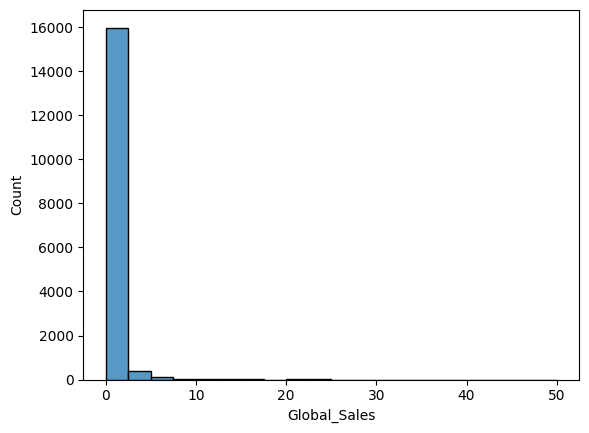

In [18]:
sns.histplot(vgame_df["Global_Sales"],bins=20,binrange=(0,50))
plt.show()

In [31]:
top_platforms=vgame_df.groupby("Platform")[["NA_Sales","EU_Sales"]].sum().sort_values(by=["NA_Sales","EU_Sales"],ascending=False)
top5=top_platforms.head(5).reset_index()
top5

,Platform,NA_Sales,EU_Sales
0,X360,601.05,280.58
1,PS2,583.84,339.29
2,Wii,507.71,268.38
3,PS3,392.26,343.71
4,DS,390.71,194.65


In [32]:
melted=top5.melt(id_vars="Platform",value_vars=["NA_Sales","EU_Sales"],var_name="Region",value_name="Sales")
melted

,Platform,Region,Sales
0,X360,NA_Sales,601.05
1,PS2,NA_Sales,583.84
2,Wii,NA_Sales,507.71
3,PS3,NA_Sales,392.26
4,DS,NA_Sales,390.71
5,X360,EU_Sales,280.58
6,PS2,EU_Sales,339.29
7,Wii,EU_Sales,268.38
8,PS3,EU_Sales,343.71
9,DS,EU_Sales,194.65


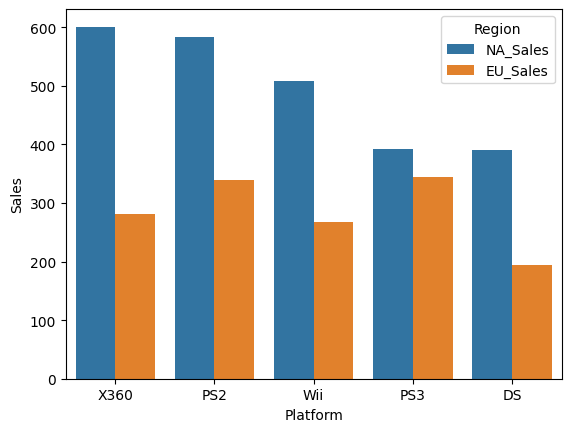

In [33]:
sns.barplot(data=melted,x="Platform",y="Sales",hue="Region")
plt.show()

In [34]:
vgame_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [35]:
print(f"Publisher with most games: {vgame_df.value_counts("Publisher").idxmax()}")

Publisher with most games: Electronic Arts


In [40]:
vgame_df.loc[vgame_df["JP_Sales"].idxmax(),["Name","Platform","Publisher","Year"]]

Name         Pokemon Red/Pokemon Blue
Platform                           GB
Publisher                    Nintendo
Year                           1996.0
Name: 4, dtype: object

In [42]:
global_sales_above5=vgame_df[vgame_df["Global_Sales"]>5]
global_sales_above5

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
200,201,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07
201,202,Resident Evil,PS,1996.0,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05
202,203,Tony Hawk's Pro Skater,PS,1999.0,Sports,Activision,3.42,1.38,0.02,0.20,5.02
203,204,Super Smash Bros. for Wii U and 3DS,WiiU,2014.0,Fighting,Nintendo,2.59,1.06,0.80,0.57,5.02


In [43]:
top_ten_genres=vgame_df.groupby("Genre")["Global_Sales"].sum().head(10)
top_ten_genres

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Name: Global_Sales, dtype: float64

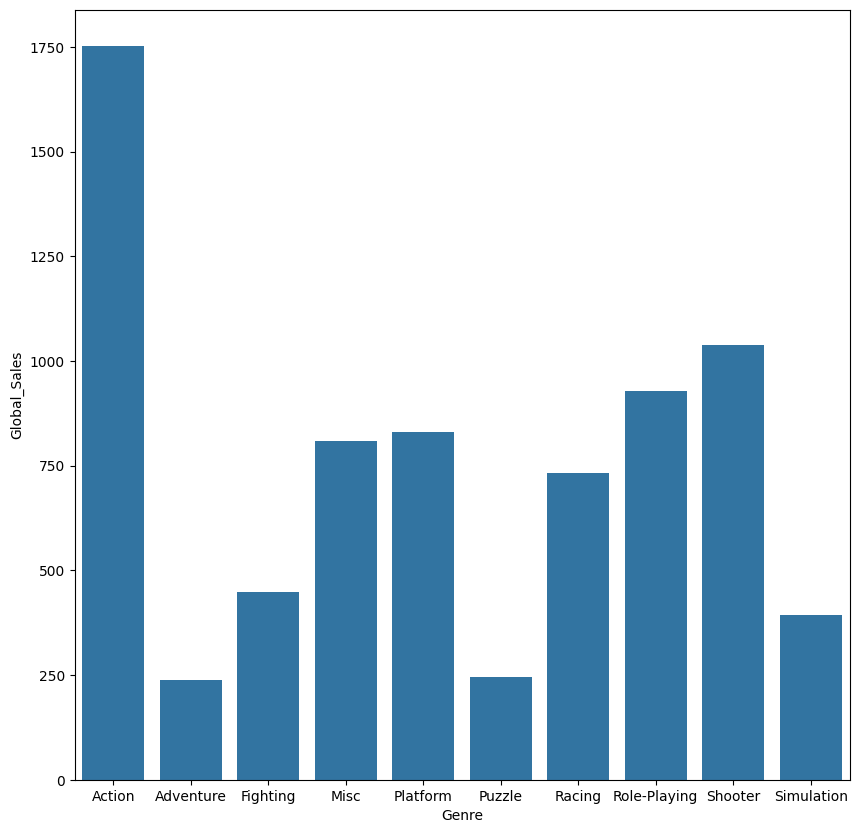

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(top_ten_genres)
plt.show()

In [46]:
corr_na_global=vgame_df[["NA_Sales","Global_Sales"]].corr()
corr_na_global

,NA_Sales,Global_Sales
NA_Sales,1.000000,0.941047
Global_Sales,0.941047,1.000000


In [54]:
platform_eu_highest=vgame_df.groupby("Platform")["EU_Sales"].sum().reset_index(name="EU_Sales").sort_values(by="EU_Sales",ascending=False)
print(f"Platform with highest Europe Sales: {platform_eu_highest.iloc[0,0:1]}")

Platform with highest Europe Sales: Platform    PS3
Name: 17, dtype: object


In [52]:
platform_eu_highest

,Platform,EU_Sales
17,PS3,343.71
16,PS2,339.29
28,X360,280.58
26,Wii,268.38
15,PS,213.60
4,DS,194.65
13,PC,139.68
18,PS4,123.70
6,GBA,75.25
19,PSP,68.25


In [57]:
older_games=vgame_df.loc[vgame_df["Year"]<2000,["Name","Year","Global_Sales"]]
older_games

,Name,Year,Global_Sales
1,Super Mario Bros.,1985.0,40.24
4,Pokemon Red/Pokemon Blue,1996.0,31.37
5,Tetris,1989.0,30.26
9,Duck Hunt,1984.0,28.31
12,Pokemon Gold/Pokemon Silver,1999.0,23.10
...,...,...,...
16379,Grand Prix Legends,1997.0,0.01
16436,Worms 2,1997.0,0.01
16506,Samurai Shodown: Warrios Rage,1999.0,0.01
16554,Psychic Detective,1995.0,0.01


In [58]:
def classify(game_year):
    if game_year<2000:
        return "Old Game"
    else:
        return "New Game"

In [59]:
vgame_df["Game Age"]=vgame_df["Year"].apply(classify)
vgame_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Game Age
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,New Game
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Old Game
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,New Game
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,New Game
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Old Game
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,New Game
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,New Game
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,New Game
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,New Game


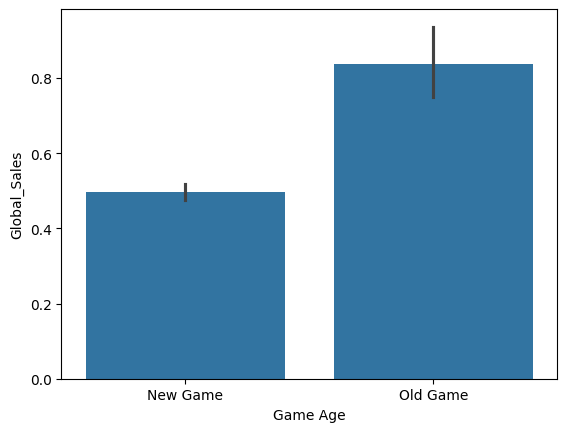

In [63]:
sns.barplot(data=vgame_df,x="Game Age",y="Global_Sales")
plt.show()

In [64]:
total_revenue=vgame_df["Global_Sales"].sum()
print(f"Total Revenue from all games combined: {total_revenue}")

Total Revenue from all games combined: 8920.440000000002
